In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds



In [ ]:
# Carregar o dataset de flores
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:]'], shuffle_files=True)

# Dividir o dataset em treinamento e teste
train_dataset, test_dataset = dataset




In [ ]:
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Redimensionar imagens
    image = image / 255.0  # Normalizar imagens
    return image, label

# Aplicar pré-processamento
train_dataset = train_dataset.map(preprocess_image).batch(32).shuffle(1000)
test_dataset = test_dataset.map(preprocess_image).batch(32)


In [ ]:
for image, label in train_dataset.take(1):
    print(image.shape)  # Deve ser (batch_size, 128, 128, 3)


(32, 128, 128, 3)


In [ ]:

# Construir o modelo
model = models.Sequential([
    layers.Input(shape=[128, 128, 3]),  # Especificar a forma de entrada com uma camada Input
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(info.features['label'].num_classes, activation='softmax')  # Número de classes
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)



Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.0061 - loss: 4.6725 - val_accuracy: 0.0147 - val_loss: 4.6242
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0245 - loss: 4.6100 - val_accuracy: 0.0245 - val_loss: 4.5611
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0241 - loss: 4.4449 - val_accuracy: 0.0294 - val_loss: 4.4501
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1279 - loss: 3.9185 - val_accuracy: 0.0490 - val_loss: 4.3094
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2720 - loss: 3.1522 - val_accuracy: 0.0980 - val_loss: 4.4424
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5121 - loss: 1.8697 - val_accuracy: 0.1127 - val_loss: 5.3340
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7856 - loss: 0.8124 - val_accuracy: 0.1127 - val_loss: 6.0405
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9230 - loss: 0.3278 - val_accuracy: 0.1078 - val_loss:

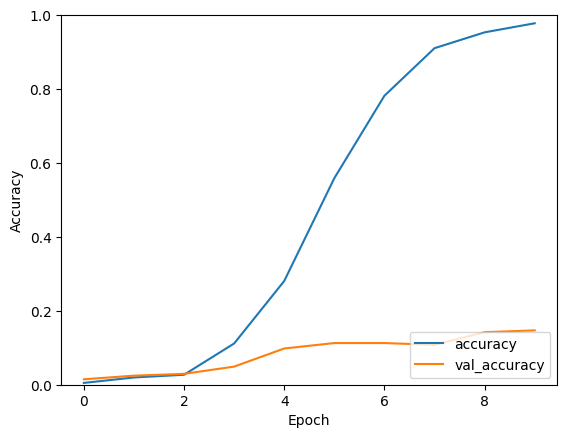

In [ ]:

# Plotar a acurácia
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.1512 - loss: 7.9547
Test accuracy: 0.14705882966518402


In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
# Caminho para a imagem baixada,
image_path = 'image_06602.jpg'

# Prever a classe da imagem
predicted_class = predict_image_class(model, image_path)

# Obter o nome da classe
class_names = info.features['label'].int2str

# Imprimir o resultado
print(f'A classe prevista para a imagem eh: {class_names(predicted_class)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
A classe prevista para a imagem eh: grape hyacinth
